In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
import numpy as np

probs = np.load('temp.data')

def move_is_correct(grid,num):
    '''
    @param grid: 6x7 grid containing the current game state
    @param num: column

    returns True if move is allowed on that column
    '''

    #if 0 is in column
    if 0 in grid[:,num]:
    
        #move is allowed
        return True

    else:

        return False

def move_still_possible(S):
    '''
    @param S: 6x7 grid containing the current game state
    returns True if grid contains no 0, therefore no move possible anymore
    '''
    return not(S[S==0].size == 0)


def move(S,p,col_num):
    '''
    @param S: 6x7 grid containing the current game state
    @param p: current player
    @param col_num: column number
    
    sets the player's number on the grid and returns the grid
    '''
    
    #sanity check
    if 0 in S[:,col_num]:    
        y = np.where(S[:,col_num]==0)[0][-1]
        S[y,col_num] = p
        return S , y, col_num
    else:
        return S, None, None
        return 
    
def move_probabilistic(S, p):
    
    #all available columns that are not already full
    _ , col = np.where(S == 0)
    col_num=np.unique(col)

    #x of available all columns
    x_to_col_num=[np.where(S[:,x] == 0)[0][-1] for x in np.unique(col)]
    
    #determine free position with max prob 
    m = max(probs[x_to_col_num,col_num])

    #and the index to that value
    _ , xy = np.where(probs==m)
    return xy

def move_at_random(S):
    '''
    @param S: 6x7 grid containing the current game state
    moves at random
    '''
    return np.random.randint(0,S.shape[1])


#neat and ugly but the fastest way to search a matrix for a vector is a string find
player1 = '1 1 1 1'
oponent = '2 2 2 2'

def move_was_winning_move(S, p):
    '''
    @param S: 6x7 grid containing the current game state
    @param p: current player
    
    combines all the allowed formations of the grid and string_finds with 
    the currents player vector. Returns true if match.
    '''
    if p == 1:
        match = player1
    else:
        match = oponent 

    l=[]
    #for every possible diag
    for i in range(-2,4):
        l.append(np.diag(S,k = i))
        l.append(np.diag(np.fliplr(S),k=i))
    #left to right
    l.append(S)
    #top to bottom
    l.append(np.rot90(S)) 

    if ''.join(np.array_str(e) for e in l).find(match) > -1:
        return True
    return False



# relate numbers (1, -1, 0) to symbols ('x', 'o', ' ')
symbols = {1:'b', 2:'r', 0:' '}

# print game state matrix using symbols
def print_game_state(S):
    B = np.copy(S).astype(object)
    for n in [1, 2, 0]:
        B[B==n] = symbols[n]
    print B





if __name__ == '__main__':
    
    outcomes = []

    for i in range(2000):


        # initialize 6x7 connectfour board
        gameState = np.zeros((6,7), dtype=int)

        # initialize player number, move counter
        player = 1
        mvcntr = 1

        # initialize flag that indicates win
        noWinnerYet = True
        while move_still_possible(gameState) and noWinnerYet:

            while True:
                # get player symbol
                name = symbols[player]
                #print '%s moves' % name

                # let player move at random
                if player == 1:
                    col_num = move_at_random(gameState)
                    #col_num, _ = move_probabilistic(gameState, player)
                # player o/r uses statistic
                else:
                    col_num = move_probabilistic(gameState, player)

                if move_is_correct(gameState, col_num):
                    gameState, _ , _ = move(gameState,player,col_num)

                    # print current game state
                    #print_game_state(gameState)

                    # evaluate game state
                    if move_was_winning_move(gameState, player):
                        #print 'player %s wins after %d moves' % (name, mvcntr)
                        noWinnerYet = False
                        outcomes.append(player)

                    # switch player and increase move counter
                    if player == 1:
                        player = 2
                    elif player == 2:
                        player = 1

                    mvcntr +=  1

                    break




        if noWinnerYet:
            #print 'game ended in a draw'
            outcomes.append(0)


### Tournament Random vs LineProb

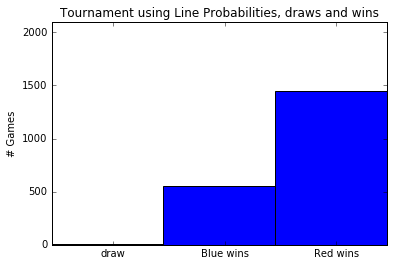

In [54]:
#outcomes.append(0)
his = plt.hist(outcomes,bins=3)
offset = -.3
plt.title("Tournament using Line Probabilities, draws and wins")
#plt.xlabel("left: o wins, middle: draw, right: x wins")
plt.ylabel("# Games") 
axes = plt.gca()
axes.set_ylim([0,2100]) # y axis should include all 2000 games
axes.set_xlim([0,2.0])
axes.set_xticks(his[1][1:]+offset)
axes.set_xticklabels( ('draw', 'Blue wins', 'Red wins') )